# Deep learning - introduction to PyTorch

# Import libraries

In [493]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import make_regression
from sklearn.metrics import confusion_matrix

### Torch dependencies ###
import torch
import torch.nn as nn
import torch.optim as optim

# PyTorch overview
![PyTorch logo](https://miro.medium.com/max/805/1*nyULxATmIItCJC90uep1ig.png)
* PyTorch is a high-performance low-level API most commonly used for deep learning and scientific computing. Because of the flexibility, pytorch is also very popular in research.
* The syntax and logic of PyTorch is very closely related to numpy. Aside from matrix operation that numpy can perform, PyTorch comprises of many extensions that helps users develop deep learning applications. One of the extensions is gradient descent and optimization
* More intuitive overview of PyTorch (until 04:18) : [Youtube](https://www.youtube.com/watch?v=RwaVqvZ3xo8)

# Fundamental PyTorch operations

### Creating a tensor

In [3]:
# Create constant tensors
a = torch.tensor([1,2,3,4,5])
b = torch.tensor([5,4,3,2,1])
print('Constant tensors : ')
print('  -> ', a)
print('  -> ', b)

# Create random tensors
a = torch.randint(1, 10, size=(5,)) # min = 1; max = 10
b = torch.randint(1, 10, size=(5,))
print('Random integer tensors : ')
print(' -> ', a)
print(' -> ', b)

# Random tensors with a specific distribution
a = torch.normal(0, 1, size=(5,))
b = torch.normal(3, 1, size=(5,))
print('Random float tensors from normal distribution : ')
print(' -> ', a)
print(' -> ', b)

Constant tensors : 
  ->  tensor([1, 2, 3, 4, 5])
  ->  tensor([5, 4, 3, 2, 1])
Random integer tensors : 
 ->  tensor([7, 5, 8, 1, 7])
 ->  tensor([9, 5, 8, 3, 8])
Random float tensors from normal distribution : 
 ->  tensor([ 0.0333, -0.5029,  1.6414, -1.5443, -0.1129])
 ->  tensor([3.2178, 2.8139, 2.8654, 1.5387, 3.0937])


### Dot product of tensors

In [4]:
# Dot product of two vectors
a = torch.randint(1, 10, size=(5,))
b = torch.randint(1, 10, size=(5,))

print(a)
print(b)
print('Dot product of a and b : ', a @ b)

# Dot product of two matrices
# Sequentially compute the dot product of a's row with b's column
a = torch.randint(1, 10, size=(2,3))
b = torch.randint(1, 10, size=(3,4))

print('---------------------------------------')
print(a)
print(b)
print('Dot product of a and b : ')
print(a @ b)

tensor([4, 9, 3, 6, 3])
tensor([4, 1, 9, 4, 3])
Dot product of a and b :  tensor(85)
---------------------------------------
tensor([[6, 8, 8],
        [9, 4, 5]])
tensor([[8, 8, 9, 8],
        [5, 3, 5, 9],
        [8, 4, 9, 5]])
Dot product of a and b : 
tensor([[152, 104, 166, 160],
        [132, 104, 146, 133]])


### Tensor addition

In [5]:
# Addition of two vectors
a = torch.randint(1, 10, size=(5,))
b = torch.randint(1, 10, size=(5,))

print(a)
print(b)
print('Addition of two vector tensors : ', a + b)
print('Addition a vector and a scalar : ', a + 2)

tensor([4, 9, 2, 3, 4])
tensor([3, 9, 1, 6, 8])
Addition of two vector tensors :  tensor([ 7, 18,  3,  9, 12])
Addition a vector and a scalar :  tensor([ 6, 11,  4,  5,  6])


In [6]:
# Addition of matrix and vector
a = torch.randint(1, 10, size=(5,5))
b = torch.randint(1, 10, size=(5,))

print(a)
print(b)
print(a+b)

tensor([[3, 6, 4, 4, 8],
        [5, 8, 1, 3, 6],
        [9, 4, 5, 8, 4],
        [3, 9, 6, 6, 6],
        [9, 1, 1, 2, 4]])
tensor([4, 3, 4, 5, 4])
tensor([[ 7,  9,  8,  9, 12],
        [ 9, 11,  5,  8, 10],
        [13,  7,  9, 13,  8],
        [ 7, 12, 10, 11, 10],
        [13,  4,  5,  7,  8]])


### Transpose

In [7]:
a = torch.randint(1, 10, size=(5,2))
print('Original matrix :\n ', a)
print('Transposed matrix : \n', torch.t(a))

Original matrix :
  tensor([[4, 6],
        [7, 9],
        [1, 7],
        [1, 1],
        [8, 6]])
Transposed matrix : 
 tensor([[4, 7, 1, 1, 8],
        [6, 9, 7, 1, 6]])


### Covariance matrix

In [8]:
# Example of a 2 by 5 matrix
a = torch.randint(1, 10, size=(2, 5), dtype=torch.float32)

cov = torch.t(a - a.mean(axis=0)) @ (a - a.mean(axis=0))
print('Matrix a : ')
print(a)
print('Covariance matrix : ')
print(cov)

Matrix a : 
tensor([[1., 3., 2., 1., 3.],
        [3., 6., 2., 4., 7.]])
Covariance matrix : 
tensor([[2.0000, 3.0000, 0.0000, 3.0000, 4.0000],
        [3.0000, 4.5000, 0.0000, 4.5000, 6.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [3.0000, 4.5000, 0.0000, 4.5000, 6.0000],
        [4.0000, 6.0000, 0.0000, 6.0000, 8.0000]])


In [9]:
np.cov(a.numpy().transpose())

array([[2. , 3. , 0. , 3. , 4. ],
       [3. , 4.5, 0. , 4.5, 6. ],
       [0. , 0. , 0. , 0. , 0. ],
       [3. , 4.5, 0. , 4.5, 6. ],
       [4. , 6. , 0. , 6. , 8. ]])

### Gradients

In [32]:
# Construct a computation graph
x = torch.tensor([2, 2], dtype=torch.float32, requires_grad=True)
b = torch.tensor([3, 1], dtype=torch.float32, requires_grad=True)
y = x ** 2 + b

# The vector full of ones passed to backward is like a "dummy" gradient
y.backward(torch.ones_like(x))
print(x.grad)
print(b.grad)

tensor([4., 4.])
tensor([1., 1.])


# Machine learning with PyTorch

## 1. Linear Regression
### 1.1. Build the model

In [357]:
class LinearRegression(nn.Module):
    def __init__(self, in_features, out_features=1, alpha=0.01):
        super(LinearRegression, self).__init__()
        self.W = nn.Parameter(torch.zeros(size=(in_features, out_features)))
        self.b = nn.Parameter(torch.ones(size=(1,)))
        
    def forward(self, inputs):
        output = inputs @ self.W + self.b
        
        return output
    
# model = LinearRegression(in_features=10)
# inputs = torch.normal(0, 1, size=(1, 10))
# model(inputs)

### 1.2. Load the dataset

In [381]:
features, targets = make_regression(n_features=2)

In [382]:
# Convert from numpy to torch tensor
features = torch.from_numpy(features)
targets = torch.from_numpy(targets)

# Cast them to float
features = features.type(torch.FloatTensor)
targets = targets.type(torch.FloatTensor)
targets = targets.reshape(-1, 1)

### 1.3. Create a training loop

In [383]:
model = LinearRegression(in_features=features.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# This will help you detect mathematical errors
torch.autograd.set_detect_anomaly(True)
epochs = 5000
losses = []
for i in range(epochs):
    optimizer.zero_grad()
    
    outputs = model(features)
    loss = criterion(outputs, targets)
    losses.append(loss)
    
    print('Iteration #', i+1, ' Loss = ', loss)
    
    loss.backward()
    optimizer.step()

Iteration # 1  Loss =  tensor(15937.1914, grad_fn=<MseLossBackward>)
Iteration # 2  Loss =  tensor(15900.7842, grad_fn=<MseLossBackward>)
Iteration # 3  Loss =  tensor(15864.4375, grad_fn=<MseLossBackward>)
Iteration # 4  Loss =  tensor(15828.1602, grad_fn=<MseLossBackward>)
Iteration # 5  Loss =  tensor(15791.9453, grad_fn=<MseLossBackward>)
Iteration # 6  Loss =  tensor(15755.7979, grad_fn=<MseLossBackward>)
Iteration # 7  Loss =  tensor(15719.7197, grad_fn=<MseLossBackward>)
Iteration # 8  Loss =  tensor(15683.7100, grad_fn=<MseLossBackward>)
Iteration # 9  Loss =  tensor(15647.7725, grad_fn=<MseLossBackward>)
Iteration # 10  Loss =  tensor(15611.9023, grad_fn=<MseLossBackward>)
Iteration # 11  Loss =  tensor(15576.1064, grad_fn=<MseLossBackward>)
Iteration # 12  Loss =  tensor(15540.3799, grad_fn=<MseLossBackward>)
Iteration # 13  Loss =  tensor(15504.7275, grad_fn=<MseLossBackward>)
Iteration # 14  Loss =  tensor(15469.1504, grad_fn=<MseLossBackward>)
Iteration # 15  Loss =  tenso

Iteration # 206  Loss =  tensor(9809.7891, grad_fn=<MseLossBackward>)
Iteration # 207  Loss =  tensor(9785.3115, grad_fn=<MseLossBackward>)
Iteration # 208  Loss =  tensor(9760.8799, grad_fn=<MseLossBackward>)
Iteration # 209  Loss =  tensor(9736.4951, grad_fn=<MseLossBackward>)
Iteration # 210  Loss =  tensor(9712.1572, grad_fn=<MseLossBackward>)
Iteration # 211  Loss =  tensor(9687.8652, grad_fn=<MseLossBackward>)
Iteration # 212  Loss =  tensor(9663.6211, grad_fn=<MseLossBackward>)
Iteration # 213  Loss =  tensor(9639.4209, grad_fn=<MseLossBackward>)
Iteration # 214  Loss =  tensor(9615.2676, grad_fn=<MseLossBackward>)
Iteration # 215  Loss =  tensor(9591.1611, grad_fn=<MseLossBackward>)
Iteration # 216  Loss =  tensor(9567.0996, grad_fn=<MseLossBackward>)
Iteration # 217  Loss =  tensor(9543.0850, grad_fn=<MseLossBackward>)
Iteration # 218  Loss =  tensor(9519.1162, grad_fn=<MseLossBackward>)
Iteration # 219  Loss =  tensor(9495.1934, grad_fn=<MseLossBackward>)
Iteration # 220  Los

Iteration # 384  Loss =  tensor(6135.2974, grad_fn=<MseLossBackward>)
Iteration # 385  Loss =  tensor(6118.2432, grad_fn=<MseLossBackward>)
Iteration # 386  Loss =  tensor(6101.2271, grad_fn=<MseLossBackward>)
Iteration # 387  Loss =  tensor(6084.2471, grad_fn=<MseLossBackward>)
Iteration # 388  Loss =  tensor(6067.3027, grad_fn=<MseLossBackward>)
Iteration # 389  Loss =  tensor(6050.3950, grad_fn=<MseLossBackward>)
Iteration # 390  Loss =  tensor(6033.5244, grad_fn=<MseLossBackward>)
Iteration # 391  Loss =  tensor(6016.6914, grad_fn=<MseLossBackward>)
Iteration # 392  Loss =  tensor(5999.8950, grad_fn=<MseLossBackward>)
Iteration # 393  Loss =  tensor(5983.1338, grad_fn=<MseLossBackward>)
Iteration # 394  Loss =  tensor(5966.4092, grad_fn=<MseLossBackward>)
Iteration # 395  Loss =  tensor(5949.7227, grad_fn=<MseLossBackward>)
Iteration # 396  Loss =  tensor(5933.0708, grad_fn=<MseLossBackward>)
Iteration # 397  Loss =  tensor(5916.4561, grad_fn=<MseLossBackward>)
Iteration # 398  Los

Iteration # 561  Loss =  tensor(3644.3882, grad_fn=<MseLossBackward>)
Iteration # 562  Loss =  tensor(3633.0657, grad_fn=<MseLossBackward>)
Iteration # 563  Loss =  tensor(3621.7715, grad_fn=<MseLossBackward>)
Iteration # 564  Loss =  tensor(3610.5049, grad_fn=<MseLossBackward>)
Iteration # 565  Loss =  tensor(3599.2666, grad_fn=<MseLossBackward>)
Iteration # 566  Loss =  tensor(3588.0559, grad_fn=<MseLossBackward>)
Iteration # 567  Loss =  tensor(3576.8726, grad_fn=<MseLossBackward>)
Iteration # 568  Loss =  tensor(3565.7168, grad_fn=<MseLossBackward>)
Iteration # 569  Loss =  tensor(3554.5896, grad_fn=<MseLossBackward>)
Iteration # 570  Loss =  tensor(3543.4900, grad_fn=<MseLossBackward>)
Iteration # 571  Loss =  tensor(3532.4175, grad_fn=<MseLossBackward>)
Iteration # 572  Loss =  tensor(3521.3728, grad_fn=<MseLossBackward>)
Iteration # 573  Loss =  tensor(3510.3560, grad_fn=<MseLossBackward>)
Iteration # 574  Loss =  tensor(3499.3660, grad_fn=<MseLossBackward>)
Iteration # 575  Los

Iteration # 737  Loss =  tensor(2041.1506, grad_fn=<MseLossBackward>)
Iteration # 738  Loss =  tensor(2034.0476, grad_fn=<MseLossBackward>)
Iteration # 739  Loss =  tensor(2026.9647, grad_fn=<MseLossBackward>)
Iteration # 740  Loss =  tensor(2019.9019, grad_fn=<MseLossBackward>)
Iteration # 741  Loss =  tensor(2012.8590, grad_fn=<MseLossBackward>)
Iteration # 742  Loss =  tensor(2005.8365, grad_fn=<MseLossBackward>)
Iteration # 743  Loss =  tensor(1998.8336, grad_fn=<MseLossBackward>)
Iteration # 744  Loss =  tensor(1991.8510, grad_fn=<MseLossBackward>)
Iteration # 745  Loss =  tensor(1984.8878, grad_fn=<MseLossBackward>)
Iteration # 746  Loss =  tensor(1977.9447, grad_fn=<MseLossBackward>)
Iteration # 747  Loss =  tensor(1971.0216, grad_fn=<MseLossBackward>)
Iteration # 748  Loss =  tensor(1964.1177, grad_fn=<MseLossBackward>)
Iteration # 749  Loss =  tensor(1957.2339, grad_fn=<MseLossBackward>)
Iteration # 750  Loss =  tensor(1950.3695, grad_fn=<MseLossBackward>)
Iteration # 751  Los

Iteration # 913  Loss =  tensor(1065.6235, grad_fn=<MseLossBackward>)
Iteration # 914  Loss =  tensor(1061.4645, grad_fn=<MseLossBackward>)
Iteration # 915  Loss =  tensor(1057.3187, grad_fn=<MseLossBackward>)
Iteration # 916  Loss =  tensor(1053.1864, grad_fn=<MseLossBackward>)
Iteration # 917  Loss =  tensor(1049.0677, grad_fn=<MseLossBackward>)
Iteration # 918  Loss =  tensor(1044.9622, grad_fn=<MseLossBackward>)
Iteration # 919  Loss =  tensor(1040.8701, grad_fn=<MseLossBackward>)
Iteration # 920  Loss =  tensor(1036.7915, grad_fn=<MseLossBackward>)
Iteration # 921  Loss =  tensor(1032.7261, grad_fn=<MseLossBackward>)
Iteration # 922  Loss =  tensor(1028.6738, grad_fn=<MseLossBackward>)
Iteration # 923  Loss =  tensor(1024.6349, grad_fn=<MseLossBackward>)
Iteration # 924  Loss =  tensor(1020.6092, grad_fn=<MseLossBackward>)
Iteration # 925  Loss =  tensor(1016.5967, grad_fn=<MseLossBackward>)
Iteration # 926  Loss =  tensor(1012.5975, grad_fn=<MseLossBackward>)
Iteration # 927  Los

Iteration # 1087  Loss =  tensor(518.4501, grad_fn=<MseLossBackward>)
Iteration # 1088  Loss =  tensor(516.1835, grad_fn=<MseLossBackward>)
Iteration # 1089  Loss =  tensor(513.9250, grad_fn=<MseLossBackward>)
Iteration # 1090  Loss =  tensor(511.6754, grad_fn=<MseLossBackward>)
Iteration # 1091  Loss =  tensor(509.4341, grad_fn=<MseLossBackward>)
Iteration # 1092  Loss =  tensor(507.2009, grad_fn=<MseLossBackward>)
Iteration # 1093  Loss =  tensor(504.9761, grad_fn=<MseLossBackward>)
Iteration # 1094  Loss =  tensor(502.7596, grad_fn=<MseLossBackward>)
Iteration # 1095  Loss =  tensor(500.5515, grad_fn=<MseLossBackward>)
Iteration # 1096  Loss =  tensor(498.3518, grad_fn=<MseLossBackward>)
Iteration # 1097  Loss =  tensor(496.1602, grad_fn=<MseLossBackward>)
Iteration # 1098  Loss =  tensor(493.9767, grad_fn=<MseLossBackward>)
Iteration # 1099  Loss =  tensor(491.8015, grad_fn=<MseLossBackward>)
Iteration # 1100  Loss =  tensor(489.6346, grad_fn=<MseLossBackward>)
Iteration # 1101  Lo

Iteration # 1263  Loss =  tensor(229.1230, grad_fn=<MseLossBackward>)
Iteration # 1264  Loss =  tensor(228.0010, grad_fn=<MseLossBackward>)
Iteration # 1265  Loss =  tensor(226.8835, grad_fn=<MseLossBackward>)
Iteration # 1266  Loss =  tensor(225.7709, grad_fn=<MseLossBackward>)
Iteration # 1267  Loss =  tensor(224.6631, grad_fn=<MseLossBackward>)
Iteration # 1268  Loss =  tensor(223.5600, grad_fn=<MseLossBackward>)
Iteration # 1269  Loss =  tensor(222.4617, grad_fn=<MseLossBackward>)
Iteration # 1270  Loss =  tensor(221.3681, grad_fn=<MseLossBackward>)
Iteration # 1271  Loss =  tensor(220.2792, grad_fn=<MseLossBackward>)
Iteration # 1272  Loss =  tensor(219.1948, grad_fn=<MseLossBackward>)
Iteration # 1273  Loss =  tensor(218.1152, grad_fn=<MseLossBackward>)
Iteration # 1274  Loss =  tensor(217.0401, grad_fn=<MseLossBackward>)
Iteration # 1275  Loss =  tensor(215.9698, grad_fn=<MseLossBackward>)
Iteration # 1276  Loss =  tensor(214.9040, grad_fn=<MseLossBackward>)
Iteration # 1277  Lo

Iteration # 1438  Loss =  tensor(92.3645, grad_fn=<MseLossBackward>)
Iteration # 1439  Loss =  tensor(91.8592, grad_fn=<MseLossBackward>)
Iteration # 1440  Loss =  tensor(91.3564, grad_fn=<MseLossBackward>)
Iteration # 1441  Loss =  tensor(90.8559, grad_fn=<MseLossBackward>)
Iteration # 1442  Loss =  tensor(90.3580, grad_fn=<MseLossBackward>)
Iteration # 1443  Loss =  tensor(89.8624, grad_fn=<MseLossBackward>)
Iteration # 1444  Loss =  tensor(89.3693, grad_fn=<MseLossBackward>)
Iteration # 1445  Loss =  tensor(88.8785, grad_fn=<MseLossBackward>)
Iteration # 1446  Loss =  tensor(88.3901, grad_fn=<MseLossBackward>)
Iteration # 1447  Loss =  tensor(87.9041, grad_fn=<MseLossBackward>)
Iteration # 1448  Loss =  tensor(87.4206, grad_fn=<MseLossBackward>)
Iteration # 1449  Loss =  tensor(86.9393, grad_fn=<MseLossBackward>)
Iteration # 1450  Loss =  tensor(86.4604, grad_fn=<MseLossBackward>)
Iteration # 1451  Loss =  tensor(85.9839, grad_fn=<MseLossBackward>)
Iteration # 1452  Loss =  tensor(8

Iteration # 1614  Loss =  tensor(33.3062, grad_fn=<MseLossBackward>)
Iteration # 1615  Loss =  tensor(33.1030, grad_fn=<MseLossBackward>)
Iteration # 1616  Loss =  tensor(32.9010, grad_fn=<MseLossBackward>)
Iteration # 1617  Loss =  tensor(32.7001, grad_fn=<MseLossBackward>)
Iteration # 1618  Loss =  tensor(32.5003, grad_fn=<MseLossBackward>)
Iteration # 1619  Loss =  tensor(32.3016, grad_fn=<MseLossBackward>)
Iteration # 1620  Loss =  tensor(32.1040, grad_fn=<MseLossBackward>)
Iteration # 1621  Loss =  tensor(31.9075, grad_fn=<MseLossBackward>)
Iteration # 1622  Loss =  tensor(31.7120, grad_fn=<MseLossBackward>)
Iteration # 1623  Loss =  tensor(31.5177, grad_fn=<MseLossBackward>)
Iteration # 1624  Loss =  tensor(31.3243, grad_fn=<MseLossBackward>)
Iteration # 1625  Loss =  tensor(31.1321, grad_fn=<MseLossBackward>)
Iteration # 1626  Loss =  tensor(30.9409, grad_fn=<MseLossBackward>)
Iteration # 1627  Loss =  tensor(30.7508, grad_fn=<MseLossBackward>)
Iteration # 1628  Loss =  tensor(3

Iteration # 1790  Loss =  tensor(10.6933, grad_fn=<MseLossBackward>)
Iteration # 1791  Loss =  tensor(10.6208, grad_fn=<MseLossBackward>)
Iteration # 1792  Loss =  tensor(10.5487, grad_fn=<MseLossBackward>)
Iteration # 1793  Loss =  tensor(10.4770, grad_fn=<MseLossBackward>)
Iteration # 1794  Loss =  tensor(10.4059, grad_fn=<MseLossBackward>)
Iteration # 1795  Loss =  tensor(10.3351, grad_fn=<MseLossBackward>)
Iteration # 1796  Loss =  tensor(10.2648, grad_fn=<MseLossBackward>)
Iteration # 1797  Loss =  tensor(10.1949, grad_fn=<MseLossBackward>)
Iteration # 1798  Loss =  tensor(10.1255, grad_fn=<MseLossBackward>)
Iteration # 1799  Loss =  tensor(10.0565, grad_fn=<MseLossBackward>)
Iteration # 1800  Loss =  tensor(9.9879, grad_fn=<MseLossBackward>)
Iteration # 1801  Loss =  tensor(9.9197, grad_fn=<MseLossBackward>)
Iteration # 1802  Loss =  tensor(9.8520, grad_fn=<MseLossBackward>)
Iteration # 1803  Loss =  tensor(9.7847, grad_fn=<MseLossBackward>)
Iteration # 1804  Loss =  tensor(9.717

Iteration # 1965  Loss =  tensor(3.0486, grad_fn=<MseLossBackward>)
Iteration # 1966  Loss =  tensor(3.0256, grad_fn=<MseLossBackward>)
Iteration # 1967  Loss =  tensor(3.0029, grad_fn=<MseLossBackward>)
Iteration # 1968  Loss =  tensor(2.9803, grad_fn=<MseLossBackward>)
Iteration # 1969  Loss =  tensor(2.9578, grad_fn=<MseLossBackward>)
Iteration # 1970  Loss =  tensor(2.9355, grad_fn=<MseLossBackward>)
Iteration # 1971  Loss =  tensor(2.9134, grad_fn=<MseLossBackward>)
Iteration # 1972  Loss =  tensor(2.8914, grad_fn=<MseLossBackward>)
Iteration # 1973  Loss =  tensor(2.8695, grad_fn=<MseLossBackward>)
Iteration # 1974  Loss =  tensor(2.8478, grad_fn=<MseLossBackward>)
Iteration # 1975  Loss =  tensor(2.8263, grad_fn=<MseLossBackward>)
Iteration # 1976  Loss =  tensor(2.8049, grad_fn=<MseLossBackward>)
Iteration # 1977  Loss =  tensor(2.7837, grad_fn=<MseLossBackward>)
Iteration # 1978  Loss =  tensor(2.7626, grad_fn=<MseLossBackward>)
Iteration # 1979  Loss =  tensor(2.7417, grad_fn

Iteration # 2141  Loss =  tensor(0.7523, grad_fn=<MseLossBackward>)
Iteration # 2142  Loss =  tensor(0.7460, grad_fn=<MseLossBackward>)
Iteration # 2143  Loss =  tensor(0.7398, grad_fn=<MseLossBackward>)
Iteration # 2144  Loss =  tensor(0.7336, grad_fn=<MseLossBackward>)
Iteration # 2145  Loss =  tensor(0.7275, grad_fn=<MseLossBackward>)
Iteration # 2146  Loss =  tensor(0.7214, grad_fn=<MseLossBackward>)
Iteration # 2147  Loss =  tensor(0.7154, grad_fn=<MseLossBackward>)
Iteration # 2148  Loss =  tensor(0.7094, grad_fn=<MseLossBackward>)
Iteration # 2149  Loss =  tensor(0.7035, grad_fn=<MseLossBackward>)
Iteration # 2150  Loss =  tensor(0.6976, grad_fn=<MseLossBackward>)
Iteration # 2151  Loss =  tensor(0.6918, grad_fn=<MseLossBackward>)
Iteration # 2152  Loss =  tensor(0.6859, grad_fn=<MseLossBackward>)
Iteration # 2153  Loss =  tensor(0.6802, grad_fn=<MseLossBackward>)
Iteration # 2154  Loss =  tensor(0.6745, grad_fn=<MseLossBackward>)
Iteration # 2155  Loss =  tensor(0.6688, grad_fn

Iteration # 2315  Loss =  tensor(0.1628, grad_fn=<MseLossBackward>)
Iteration # 2316  Loss =  tensor(0.1613, grad_fn=<MseLossBackward>)
Iteration # 2317  Loss =  tensor(0.1598, grad_fn=<MseLossBackward>)
Iteration # 2318  Loss =  tensor(0.1583, grad_fn=<MseLossBackward>)
Iteration # 2319  Loss =  tensor(0.1568, grad_fn=<MseLossBackward>)
Iteration # 2320  Loss =  tensor(0.1554, grad_fn=<MseLossBackward>)
Iteration # 2321  Loss =  tensor(0.1539, grad_fn=<MseLossBackward>)
Iteration # 2322  Loss =  tensor(0.1525, grad_fn=<MseLossBackward>)
Iteration # 2323  Loss =  tensor(0.1511, grad_fn=<MseLossBackward>)
Iteration # 2324  Loss =  tensor(0.1497, grad_fn=<MseLossBackward>)
Iteration # 2325  Loss =  tensor(0.1483, grad_fn=<MseLossBackward>)
Iteration # 2326  Loss =  tensor(0.1470, grad_fn=<MseLossBackward>)
Iteration # 2327  Loss =  tensor(0.1456, grad_fn=<MseLossBackward>)
Iteration # 2328  Loss =  tensor(0.1442, grad_fn=<MseLossBackward>)
Iteration # 2329  Loss =  tensor(0.1429, grad_fn

Iteration # 2599  Loss =  tensor(0.0094, grad_fn=<MseLossBackward>)
Iteration # 2600  Loss =  tensor(0.0093, grad_fn=<MseLossBackward>)
Iteration # 2601  Loss =  tensor(0.0092, grad_fn=<MseLossBackward>)
Iteration # 2602  Loss =  tensor(0.0091, grad_fn=<MseLossBackward>)
Iteration # 2603  Loss =  tensor(0.0090, grad_fn=<MseLossBackward>)
Iteration # 2604  Loss =  tensor(0.0089, grad_fn=<MseLossBackward>)
Iteration # 2605  Loss =  tensor(0.0088, grad_fn=<MseLossBackward>)
Iteration # 2606  Loss =  tensor(0.0087, grad_fn=<MseLossBackward>)
Iteration # 2607  Loss =  tensor(0.0086, grad_fn=<MseLossBackward>)
Iteration # 2608  Loss =  tensor(0.0085, grad_fn=<MseLossBackward>)
Iteration # 2609  Loss =  tensor(0.0084, grad_fn=<MseLossBackward>)
Iteration # 2610  Loss =  tensor(0.0084, grad_fn=<MseLossBackward>)
Iteration # 2611  Loss =  tensor(0.0083, grad_fn=<MseLossBackward>)
Iteration # 2612  Loss =  tensor(0.0082, grad_fn=<MseLossBackward>)
Iteration # 2613  Loss =  tensor(0.0081, grad_fn

Iteration # 2778  Loss =  tensor(0.0012, grad_fn=<MseLossBackward>)
Iteration # 2779  Loss =  tensor(0.0012, grad_fn=<MseLossBackward>)
Iteration # 2780  Loss =  tensor(0.0012, grad_fn=<MseLossBackward>)
Iteration # 2781  Loss =  tensor(0.0012, grad_fn=<MseLossBackward>)
Iteration # 2782  Loss =  tensor(0.0012, grad_fn=<MseLossBackward>)
Iteration # 2783  Loss =  tensor(0.0011, grad_fn=<MseLossBackward>)
Iteration # 2784  Loss =  tensor(0.0011, grad_fn=<MseLossBackward>)
Iteration # 2785  Loss =  tensor(0.0011, grad_fn=<MseLossBackward>)
Iteration # 2786  Loss =  tensor(0.0011, grad_fn=<MseLossBackward>)
Iteration # 2787  Loss =  tensor(0.0011, grad_fn=<MseLossBackward>)
Iteration # 2788  Loss =  tensor(0.0011, grad_fn=<MseLossBackward>)
Iteration # 2789  Loss =  tensor(0.0011, grad_fn=<MseLossBackward>)
Iteration # 2790  Loss =  tensor(0.0011, grad_fn=<MseLossBackward>)
Iteration # 2791  Loss =  tensor(0.0010, grad_fn=<MseLossBackward>)
Iteration # 2792  Loss =  tensor(0.0010, grad_fn

Iteration # 2956  Loss =  tensor(0.0001, grad_fn=<MseLossBackward>)
Iteration # 2957  Loss =  tensor(0.0001, grad_fn=<MseLossBackward>)
Iteration # 2958  Loss =  tensor(0.0001, grad_fn=<MseLossBackward>)
Iteration # 2959  Loss =  tensor(0.0001, grad_fn=<MseLossBackward>)
Iteration # 2960  Loss =  tensor(0.0001, grad_fn=<MseLossBackward>)
Iteration # 2961  Loss =  tensor(0.0001, grad_fn=<MseLossBackward>)
Iteration # 2962  Loss =  tensor(0.0001, grad_fn=<MseLossBackward>)
Iteration # 2963  Loss =  tensor(0.0001, grad_fn=<MseLossBackward>)
Iteration # 2964  Loss =  tensor(0.0001, grad_fn=<MseLossBackward>)
Iteration # 2965  Loss =  tensor(0.0001, grad_fn=<MseLossBackward>)
Iteration # 2966  Loss =  tensor(0.0001, grad_fn=<MseLossBackward>)
Iteration # 2967  Loss =  tensor(0.0001, grad_fn=<MseLossBackward>)
Iteration # 2968  Loss =  tensor(0.0001, grad_fn=<MseLossBackward>)
Iteration # 2969  Loss =  tensor(0.0001, grad_fn=<MseLossBackward>)
Iteration # 2970  Loss =  tensor(0.0001, grad_fn

Iteration # 3134  Loss =  tensor(1.0824e-05, grad_fn=<MseLossBackward>)
Iteration # 3135  Loss =  tensor(1.0662e-05, grad_fn=<MseLossBackward>)
Iteration # 3136  Loss =  tensor(1.0523e-05, grad_fn=<MseLossBackward>)
Iteration # 3137  Loss =  tensor(1.0367e-05, grad_fn=<MseLossBackward>)
Iteration # 3138  Loss =  tensor(1.0228e-05, grad_fn=<MseLossBackward>)
Iteration # 3139  Loss =  tensor(1.0091e-05, grad_fn=<MseLossBackward>)
Iteration # 3140  Loss =  tensor(9.9460e-06, grad_fn=<MseLossBackward>)
Iteration # 3141  Loss =  tensor(9.7964e-06, grad_fn=<MseLossBackward>)
Iteration # 3142  Loss =  tensor(9.6554e-06, grad_fn=<MseLossBackward>)
Iteration # 3143  Loss =  tensor(9.5252e-06, grad_fn=<MseLossBackward>)
Iteration # 3144  Loss =  tensor(9.3850e-06, grad_fn=<MseLossBackward>)
Iteration # 3145  Loss =  tensor(9.2503e-06, grad_fn=<MseLossBackward>)
Iteration # 3146  Loss =  tensor(9.1074e-06, grad_fn=<MseLossBackward>)
Iteration # 3147  Loss =  tensor(8.9794e-06, grad_fn=<MseLossBac

Iteration # 3312  Loss =  tensor(8.5400e-07, grad_fn=<MseLossBackward>)
Iteration # 3313  Loss =  tensor(8.4379e-07, grad_fn=<MseLossBackward>)
Iteration # 3314  Loss =  tensor(8.3172e-07, grad_fn=<MseLossBackward>)
Iteration # 3315  Loss =  tensor(8.2293e-07, grad_fn=<MseLossBackward>)
Iteration # 3316  Loss =  tensor(8.0933e-07, grad_fn=<MseLossBackward>)
Iteration # 3317  Loss =  tensor(7.9972e-07, grad_fn=<MseLossBackward>)
Iteration # 3318  Loss =  tensor(7.8916e-07, grad_fn=<MseLossBackward>)
Iteration # 3319  Loss =  tensor(7.7795e-07, grad_fn=<MseLossBackward>)
Iteration # 3320  Loss =  tensor(7.6721e-07, grad_fn=<MseLossBackward>)
Iteration # 3321  Loss =  tensor(7.5767e-07, grad_fn=<MseLossBackward>)
Iteration # 3322  Loss =  tensor(7.4562e-07, grad_fn=<MseLossBackward>)
Iteration # 3323  Loss =  tensor(7.3640e-07, grad_fn=<MseLossBackward>)
Iteration # 3324  Loss =  tensor(7.2659e-07, grad_fn=<MseLossBackward>)
Iteration # 3325  Loss =  tensor(7.1528e-07, grad_fn=<MseLossBac

Iteration # 3487  Loss =  tensor(3.4566e-07, grad_fn=<MseLossBackward>)
Iteration # 3488  Loss =  tensor(3.4566e-07, grad_fn=<MseLossBackward>)
Iteration # 3489  Loss =  tensor(3.4664e-07, grad_fn=<MseLossBackward>)
Iteration # 3490  Loss =  tensor(3.4664e-07, grad_fn=<MseLossBackward>)
Iteration # 3491  Loss =  tensor(3.4664e-07, grad_fn=<MseLossBackward>)
Iteration # 3492  Loss =  tensor(3.4664e-07, grad_fn=<MseLossBackward>)
Iteration # 3493  Loss =  tensor(3.4664e-07, grad_fn=<MseLossBackward>)
Iteration # 3494  Loss =  tensor(3.4566e-07, grad_fn=<MseLossBackward>)
Iteration # 3495  Loss =  tensor(3.3919e-07, grad_fn=<MseLossBackward>)
Iteration # 3496  Loss =  tensor(3.4014e-07, grad_fn=<MseLossBackward>)
Iteration # 3497  Loss =  tensor(3.4014e-07, grad_fn=<MseLossBackward>)
Iteration # 3498  Loss =  tensor(3.4014e-07, grad_fn=<MseLossBackward>)
Iteration # 3499  Loss =  tensor(3.4014e-07, grad_fn=<MseLossBackward>)
Iteration # 3500  Loss =  tensor(3.4014e-07, grad_fn=<MseLossBac

Iteration # 3665  Loss =  tensor(3.1378e-07, grad_fn=<MseLossBackward>)
Iteration # 3666  Loss =  tensor(3.1377e-07, grad_fn=<MseLossBackward>)
Iteration # 3667  Loss =  tensor(3.0853e-07, grad_fn=<MseLossBackward>)
Iteration # 3668  Loss =  tensor(3.0794e-07, grad_fn=<MseLossBackward>)
Iteration # 3669  Loss =  tensor(3.0794e-07, grad_fn=<MseLossBackward>)
Iteration # 3670  Loss =  tensor(3.0794e-07, grad_fn=<MseLossBackward>)
Iteration # 3671  Loss =  tensor(3.0853e-07, grad_fn=<MseLossBackward>)
Iteration # 3672  Loss =  tensor(3.0853e-07, grad_fn=<MseLossBackward>)
Iteration # 3673  Loss =  tensor(3.0853e-07, grad_fn=<MseLossBackward>)
Iteration # 3674  Loss =  tensor(3.0853e-07, grad_fn=<MseLossBackward>)
Iteration # 3675  Loss =  tensor(3.0853e-07, grad_fn=<MseLossBackward>)
Iteration # 3676  Loss =  tensor(3.0853e-07, grad_fn=<MseLossBackward>)
Iteration # 3677  Loss =  tensor(3.0853e-07, grad_fn=<MseLossBackward>)
Iteration # 3678  Loss =  tensor(3.0853e-07, grad_fn=<MseLossBac

Iteration # 3840  Loss =  tensor(2.6323e-07, grad_fn=<MseLossBackward>)
Iteration # 3841  Loss =  tensor(2.6323e-07, grad_fn=<MseLossBackward>)
Iteration # 3842  Loss =  tensor(2.6323e-07, grad_fn=<MseLossBackward>)
Iteration # 3843  Loss =  tensor(2.6323e-07, grad_fn=<MseLossBackward>)
Iteration # 3844  Loss =  tensor(2.6324e-07, grad_fn=<MseLossBackward>)
Iteration # 3845  Loss =  tensor(2.5780e-07, grad_fn=<MseLossBackward>)
Iteration # 3846  Loss =  tensor(2.5780e-07, grad_fn=<MseLossBackward>)
Iteration # 3847  Loss =  tensor(2.5780e-07, grad_fn=<MseLossBackward>)
Iteration # 3848  Loss =  tensor(2.5780e-07, grad_fn=<MseLossBackward>)
Iteration # 3849  Loss =  tensor(2.5780e-07, grad_fn=<MseLossBackward>)
Iteration # 3850  Loss =  tensor(2.5780e-07, grad_fn=<MseLossBackward>)
Iteration # 3851  Loss =  tensor(2.5780e-07, grad_fn=<MseLossBackward>)
Iteration # 3852  Loss =  tensor(2.5780e-07, grad_fn=<MseLossBackward>)
Iteration # 3853  Loss =  tensor(2.5780e-07, grad_fn=<MseLossBac

Iteration # 4015  Loss =  tensor(2.1716e-07, grad_fn=<MseLossBackward>)
Iteration # 4016  Loss =  tensor(2.1716e-07, grad_fn=<MseLossBackward>)
Iteration # 4017  Loss =  tensor(2.1716e-07, grad_fn=<MseLossBackward>)
Iteration # 4018  Loss =  tensor(2.1716e-07, grad_fn=<MseLossBackward>)
Iteration # 4019  Loss =  tensor(2.1716e-07, grad_fn=<MseLossBackward>)
Iteration # 4020  Loss =  tensor(2.1716e-07, grad_fn=<MseLossBackward>)
Iteration # 4021  Loss =  tensor(2.1716e-07, grad_fn=<MseLossBackward>)
Iteration # 4022  Loss =  tensor(2.1716e-07, grad_fn=<MseLossBackward>)
Iteration # 4023  Loss =  tensor(2.1716e-07, grad_fn=<MseLossBackward>)
Iteration # 4024  Loss =  tensor(2.1716e-07, grad_fn=<MseLossBackward>)
Iteration # 4025  Loss =  tensor(2.1716e-07, grad_fn=<MseLossBackward>)
Iteration # 4026  Loss =  tensor(2.1716e-07, grad_fn=<MseLossBackward>)
Iteration # 4027  Loss =  tensor(2.1716e-07, grad_fn=<MseLossBackward>)
Iteration # 4028  Loss =  tensor(2.1716e-07, grad_fn=<MseLossBac

Iteration # 4188  Loss =  tensor(1.8306e-07, grad_fn=<MseLossBackward>)
Iteration # 4189  Loss =  tensor(1.8306e-07, grad_fn=<MseLossBackward>)
Iteration # 4190  Loss =  tensor(1.8306e-07, grad_fn=<MseLossBackward>)
Iteration # 4191  Loss =  tensor(1.8306e-07, grad_fn=<MseLossBackward>)
Iteration # 4192  Loss =  tensor(1.8306e-07, grad_fn=<MseLossBackward>)
Iteration # 4193  Loss =  tensor(1.8296e-07, grad_fn=<MseLossBackward>)
Iteration # 4194  Loss =  tensor(1.8296e-07, grad_fn=<MseLossBackward>)
Iteration # 4195  Loss =  tensor(1.8296e-07, grad_fn=<MseLossBackward>)
Iteration # 4196  Loss =  tensor(1.8306e-07, grad_fn=<MseLossBackward>)
Iteration # 4197  Loss =  tensor(1.8306e-07, grad_fn=<MseLossBackward>)
Iteration # 4198  Loss =  tensor(1.8306e-07, grad_fn=<MseLossBackward>)
Iteration # 4199  Loss =  tensor(1.8306e-07, grad_fn=<MseLossBackward>)
Iteration # 4200  Loss =  tensor(1.8306e-07, grad_fn=<MseLossBackward>)
Iteration # 4201  Loss =  tensor(1.8306e-07, grad_fn=<MseLossBac

Iteration # 4362  Loss =  tensor(1.5248e-07, grad_fn=<MseLossBackward>)
Iteration # 4363  Loss =  tensor(1.5248e-07, grad_fn=<MseLossBackward>)
Iteration # 4364  Loss =  tensor(1.5248e-07, grad_fn=<MseLossBackward>)
Iteration # 4365  Loss =  tensor(1.5248e-07, grad_fn=<MseLossBackward>)
Iteration # 4366  Loss =  tensor(1.5247e-07, grad_fn=<MseLossBackward>)
Iteration # 4367  Loss =  tensor(1.5247e-07, grad_fn=<MseLossBackward>)
Iteration # 4368  Loss =  tensor(1.5313e-07, grad_fn=<MseLossBackward>)
Iteration # 4369  Loss =  tensor(1.5313e-07, grad_fn=<MseLossBackward>)
Iteration # 4370  Loss =  tensor(1.5313e-07, grad_fn=<MseLossBackward>)
Iteration # 4371  Loss =  tensor(1.4851e-07, grad_fn=<MseLossBackward>)
Iteration # 4372  Loss =  tensor(1.4787e-07, grad_fn=<MseLossBackward>)
Iteration # 4373  Loss =  tensor(1.4787e-07, grad_fn=<MseLossBackward>)
Iteration # 4374  Loss =  tensor(1.4787e-07, grad_fn=<MseLossBackward>)
Iteration # 4375  Loss =  tensor(1.4851e-07, grad_fn=<MseLossBac

Iteration # 4536  Loss =  tensor(1.2869e-07, grad_fn=<MseLossBackward>)
Iteration # 4537  Loss =  tensor(1.2930e-07, grad_fn=<MseLossBackward>)
Iteration # 4538  Loss =  tensor(1.2930e-07, grad_fn=<MseLossBackward>)
Iteration # 4539  Loss =  tensor(1.2930e-07, grad_fn=<MseLossBackward>)
Iteration # 4540  Loss =  tensor(1.2869e-07, grad_fn=<MseLossBackward>)
Iteration # 4541  Loss =  tensor(1.2930e-07, grad_fn=<MseLossBackward>)
Iteration # 4542  Loss =  tensor(1.2869e-07, grad_fn=<MseLossBackward>)
Iteration # 4543  Loss =  tensor(1.2930e-07, grad_fn=<MseLossBackward>)
Iteration # 4544  Loss =  tensor(1.2869e-07, grad_fn=<MseLossBackward>)
Iteration # 4545  Loss =  tensor(1.2930e-07, grad_fn=<MseLossBackward>)
Iteration # 4546  Loss =  tensor(1.2930e-07, grad_fn=<MseLossBackward>)
Iteration # 4547  Loss =  tensor(1.2869e-07, grad_fn=<MseLossBackward>)
Iteration # 4548  Loss =  tensor(1.2869e-07, grad_fn=<MseLossBackward>)
Iteration # 4549  Loss =  tensor(1.2930e-07, grad_fn=<MseLossBac

Iteration # 4708  Loss =  tensor(1.0786e-07, grad_fn=<MseLossBackward>)
Iteration # 4709  Loss =  tensor(1.0786e-07, grad_fn=<MseLossBackward>)
Iteration # 4710  Loss =  tensor(1.0786e-07, grad_fn=<MseLossBackward>)
Iteration # 4711  Loss =  tensor(1.0786e-07, grad_fn=<MseLossBackward>)
Iteration # 4712  Loss =  tensor(1.0786e-07, grad_fn=<MseLossBackward>)
Iteration # 4713  Loss =  tensor(1.0794e-07, grad_fn=<MseLossBackward>)
Iteration # 4714  Loss =  tensor(1.0794e-07, grad_fn=<MseLossBackward>)
Iteration # 4715  Loss =  tensor(1.0786e-07, grad_fn=<MseLossBackward>)
Iteration # 4716  Loss =  tensor(1.0786e-07, grad_fn=<MseLossBackward>)
Iteration # 4717  Loss =  tensor(1.0786e-07, grad_fn=<MseLossBackward>)
Iteration # 4718  Loss =  tensor(1.0786e-07, grad_fn=<MseLossBackward>)
Iteration # 4719  Loss =  tensor(1.0786e-07, grad_fn=<MseLossBackward>)
Iteration # 4720  Loss =  tensor(1.0786e-07, grad_fn=<MseLossBackward>)
Iteration # 4721  Loss =  tensor(1.0786e-07, grad_fn=<MseLossBac

Iteration # 4882  Loss =  tensor(9.0974e-08, grad_fn=<MseLossBackward>)
Iteration # 4883  Loss =  tensor(9.0974e-08, grad_fn=<MseLossBackward>)
Iteration # 4884  Loss =  tensor(9.0974e-08, grad_fn=<MseLossBackward>)
Iteration # 4885  Loss =  tensor(9.1297e-08, grad_fn=<MseLossBackward>)
Iteration # 4886  Loss =  tensor(9.1298e-08, grad_fn=<MseLossBackward>)
Iteration # 4887  Loss =  tensor(9.1298e-08, grad_fn=<MseLossBackward>)
Iteration # 4888  Loss =  tensor(8.8031e-08, grad_fn=<MseLossBackward>)
Iteration # 4889  Loss =  tensor(8.8031e-08, grad_fn=<MseLossBackward>)
Iteration # 4890  Loss =  tensor(8.7712e-08, grad_fn=<MseLossBackward>)
Iteration # 4891  Loss =  tensor(8.7709e-08, grad_fn=<MseLossBackward>)
Iteration # 4892  Loss =  tensor(8.7714e-08, grad_fn=<MseLossBackward>)
Iteration # 4893  Loss =  tensor(8.7714e-08, grad_fn=<MseLossBackward>)
Iteration # 4894  Loss =  tensor(8.7714e-08, grad_fn=<MseLossBackward>)
Iteration # 4895  Loss =  tensor(8.7714e-08, grad_fn=<MseLossBac

## 1.4. Visualize the results

torch.Size([100, 1]) torch.Size([100, 1])


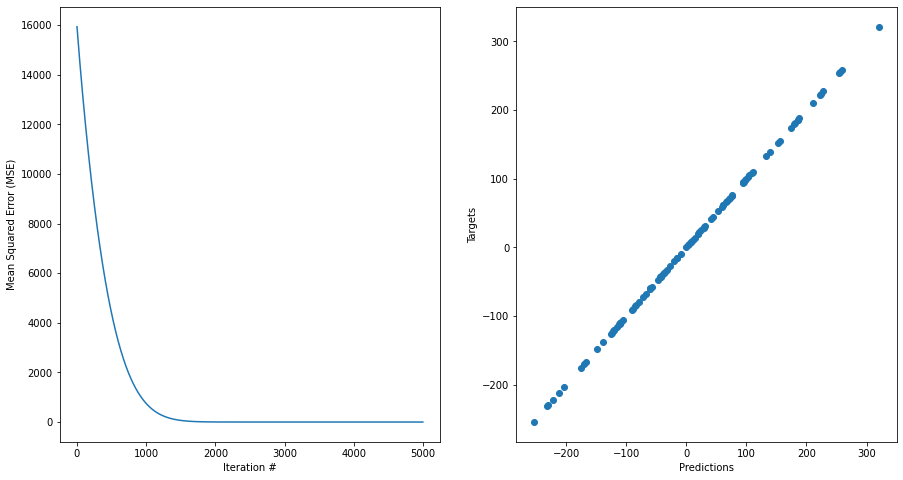

In [385]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Plot the losses
ax[0].plot(losses)
ax[0].set_xlabel('Iteration #')
ax[0].set_ylabel('Mean Squared Error (MSE)')

predictions = model(features)
print(targets.shape, predictions.shape)
ax[1].scatter(predictions.detach().numpy(), targets.detach().numpy())
ax[1].set_xlabel('Predictions')
ax[1].set_ylabel('Targets')
plt.show()

## 2. A classification model

### 2.1. Build the model

In [486]:
class Classifier(nn.Module):
    def __init__(self, in_features, n_classes=10):
        super(Classifier, self).__init__()
        self.linear = nn.Linear(in_features=in_features, out_features=n_classes)
        self.output = nn.Softmax(dim=1)
        
    def forward(self, inputs):
        output = self.linear(inputs) # X @ W + b
        output = self.output(output)
        
        return output
    
model = Classifier(6, n_classes=5)
model(torch.normal(0, 1, size=(1, 6)))
model(torch.normal(0, 1, size=(1, 6))).sum()

tensor(1.0000, grad_fn=<SumBackward0>)

### 2.2. Load the dataset

In [487]:
data = pd.read_csv('../datasets/wine.csv')
data = data.dropna()
data = data.rename(columns={'OD280/OD315 of diluted wines':'protein'})

data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,protein,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [488]:
# Get top correlated attributes
top_corr = data.corr()['Class'].apply(lambda x : abs(x)).sort_values()

In [489]:
# Get top correlated attributes
top_k = 6
columns = top_corr.index[-1-top_k:-1]
features = data[columns]

# Preprocess attributes and get the targets
features = StandardScaler().fit_transform(features)
targets = data['Class'].values.reshape(-1, 1)
targets = OneHotEncoder().fit_transform(targets).toarray()

# Get number of unique classes
n_classes = len(np.unique(data['Class']))

In [490]:
# Convert from numpy to torch tensor
features = torch.from_numpy(features)
targets = torch.from_numpy(targets)

# Cast them to float
features = features.type(torch.FloatTensor)
targets = targets.type(torch.FloatTensor)

### 2.3. Define a training loop

In [491]:
model = Classifier(in_features=features.shape[1], n_classes=n_classes)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 1000
losses = []
torch.autograd.set_detect_anomaly(True)

for i in range(epochs):
    optimizer.zero_grad()
    
    outputs = model(features)
    loss = criterion(outputs, targets)
    
    print('Iteration #', i+1, ' Loss = ', loss)
    
    loss.backward()
    optimizer.step()

Iteration # 1  Loss =  tensor(0.7093, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 2  Loss =  tensor(0.7071, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 3  Loss =  tensor(0.7049, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 4  Loss =  tensor(0.7028, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 5  Loss =  tensor(0.7006, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 6  Loss =  tensor(0.6985, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 7  Loss =  tensor(0.6963, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 8  Loss =  tensor(0.6942, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 9  Loss =  tensor(0.6921, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 10  Loss =  tensor(0.6899, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 11  Loss =  tensor(0.6878, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 12  Loss =  tensor(0.6857, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 13  Loss =  tensor(0.6836, grad_fn=<BinaryCrossEntropyBackward>)
Iteratio

Iteration # 135  Loss =  tensor(0.4876, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 136  Loss =  tensor(0.4864, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 137  Loss =  tensor(0.4852, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 138  Loss =  tensor(0.4840, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 139  Loss =  tensor(0.4828, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 140  Loss =  tensor(0.4816, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 141  Loss =  tensor(0.4804, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 142  Loss =  tensor(0.4792, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 143  Loss =  tensor(0.4780, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 144  Loss =  tensor(0.4769, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 145  Loss =  tensor(0.4757, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 146  Loss =  tensor(0.4745, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 147  Loss =  tensor(0.4734, grad_fn=<BinaryCrossEntr

Iteration # 268  Loss =  tensor(0.3622, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 269  Loss =  tensor(0.3615, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 270  Loss =  tensor(0.3607, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 271  Loss =  tensor(0.3600, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 272  Loss =  tensor(0.3593, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 273  Loss =  tensor(0.3586, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 274  Loss =  tensor(0.3579, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 275  Loss =  tensor(0.3572, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 276  Loss =  tensor(0.3564, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 277  Loss =  tensor(0.3557, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 278  Loss =  tensor(0.3550, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 279  Loss =  tensor(0.3543, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 280  Loss =  tensor(0.3536, grad_fn=<BinaryCrossEntr

Iteration # 400  Loss =  tensor(0.2852, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 401  Loss =  tensor(0.2847, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 402  Loss =  tensor(0.2843, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 403  Loss =  tensor(0.2838, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 404  Loss =  tensor(0.2834, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 405  Loss =  tensor(0.2829, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 406  Loss =  tensor(0.2824, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 407  Loss =  tensor(0.2820, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 408  Loss =  tensor(0.2815, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 409  Loss =  tensor(0.2811, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 410  Loss =  tensor(0.2807, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 411  Loss =  tensor(0.2802, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 412  Loss =  tensor(0.2798, grad_fn=<BinaryCrossEntr

Iteration # 533  Loss =  tensor(0.2358, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 534  Loss =  tensor(0.2355, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 535  Loss =  tensor(0.2352, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 536  Loss =  tensor(0.2349, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 537  Loss =  tensor(0.2346, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 538  Loss =  tensor(0.2344, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 539  Loss =  tensor(0.2341, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 540  Loss =  tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 541  Loss =  tensor(0.2335, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 542  Loss =  tensor(0.2332, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 543  Loss =  tensor(0.2329, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 544  Loss =  tensor(0.2326, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 545  Loss =  tensor(0.2323, grad_fn=<BinaryCrossEntr

Iteration # 665  Loss =  tensor(0.2033, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 666  Loss =  tensor(0.2031, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 667  Loss =  tensor(0.2029, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 668  Loss =  tensor(0.2027, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 669  Loss =  tensor(0.2025, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 670  Loss =  tensor(0.2023, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 671  Loss =  tensor(0.2021, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 672  Loss =  tensor(0.2019, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 673  Loss =  tensor(0.2017, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 674  Loss =  tensor(0.2015, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 675  Loss =  tensor(0.2013, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 676  Loss =  tensor(0.2011, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 677  Loss =  tensor(0.2009, grad_fn=<BinaryCrossEntr

Iteration # 798  Loss =  tensor(0.1803, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 799  Loss =  tensor(0.1801, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 800  Loss =  tensor(0.1800, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 801  Loss =  tensor(0.1799, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 802  Loss =  tensor(0.1797, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 803  Loss =  tensor(0.1796, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 804  Loss =  tensor(0.1794, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 805  Loss =  tensor(0.1793, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 806  Loss =  tensor(0.1791, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 807  Loss =  tensor(0.1790, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 808  Loss =  tensor(0.1788, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 809  Loss =  tensor(0.1787, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 810  Loss =  tensor(0.1785, grad_fn=<BinaryCrossEntr

Iteration # 931  Loss =  tensor(0.1632, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 932  Loss =  tensor(0.1631, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 933  Loss =  tensor(0.1630, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 934  Loss =  tensor(0.1629, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 935  Loss =  tensor(0.1627, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 936  Loss =  tensor(0.1626, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 937  Loss =  tensor(0.1625, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 938  Loss =  tensor(0.1624, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 939  Loss =  tensor(0.1623, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 940  Loss =  tensor(0.1622, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 941  Loss =  tensor(0.1621, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 942  Loss =  tensor(0.1620, grad_fn=<BinaryCrossEntropyBackward>)
Iteration # 943  Loss =  tensor(0.1619, grad_fn=<BinaryCrossEntr

In [492]:
predictions = model(features)
predictions = predictions.detach().numpy()
targets = targets.detach().numpy()

predictions = np.argmax(predictions, axis=1)
targets = np.argmax(targets, axis=1)

conf_matrix = confusion_matrix(predictions, targets)

<AxesSubplot:>

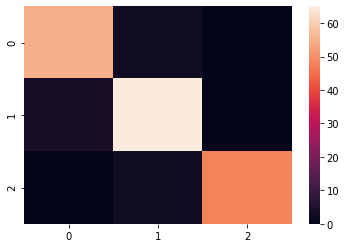

In [494]:
sns.heatmap(conf_matrix)